In [2]:
import sys
from functools import partial
from zipfile import ZipFile
import pandas as pd
import numpy as np
import re
sys.path.append('../src')
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17897\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17897\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Your contact details

In [3]:
# If you're having problem importing this file, copy and paste the contents of "uatt.py" in this cell instead
# of the import statement
from uatt import submit
my_submit = partial(submit, "Avi Hazan", "IAI", "avi@coca-int.com", "0542470502")

# Read data

In [63]:
def clean_content(txt):
    stemmer = WordNetLemmatizer()
    document = re.sub(r'\W', ' ', str(txt))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    
    document = document.lower()
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    document = ''.join(i for i in document if not i.isdigit())
    document = document.replace('exhibit','')
    document = document.replace('agreement','')

    return document
    


def find_uinque_words(txt):
    words = txt.split()
    unique = []
    for word in words:
        if word not in unique:
            unique.append(word)
            
    return unique 
 
def find_common_words(txt):
    stop_words=set(stopwords.words("english"))
    tokenized_word=word_tokenize(txt)

    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)

    fdist = FreqDist(filtered_sent)
    fdist = fdist.most_common(20)
    
    common=[]
    for item in fdist:
        common.append(item[0])
    
    return common, fdist


In [5]:

data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
            
        content = z.read(fname).decode('utf8')
        content = clean_content(content)
        uniques = find_uinque_words(content)
        common, fdist = find_common_words(content)
        
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content, uniques, common))
        df_train = pd.DataFrame(data, columns=("id", "label", "content", "unique", "common"))


df_train.sample(20)




,id,label,content,unique,common
3976,35430,rsu,this restricted stock unit is entered int...,"[this, restricted, stock, unit, is, entered, i...","[employee, unit, company, shall, share, common..."
1906,16120,employment,this employment dated and effective a of t...,"[this, employment, dated, and, effective, a, o...","[employee, employer, subsidiary, shall, employ..."
1416,11220,employment,this between mr perry campbell the employe...,"[this, between, mr, perry, campbell, the, empl...","[employee, company, shall, employment, section..."
615,03210,employment,this employment the is made a of the rd d...,"[this, employment, the, is, made, a, of, rd, d...","[executive, company, shall, date, term, termin..."
2414,19810,rsu,logitech international a stock incentive p...,"[logitech, international, a, stock, incentive,...","[participant, company, stock, unit, restricted..."
3326,28930,rsu,sw group inc restricted stock plan for non...,"[sw, group, inc, restricted, stock, plan, for,...","[grantee, share, shall, awarded, company, plan..."
705,04110,employment,dan griesemer this employment this is dat...,"[dan, griesemer, this, employment, is, dated, ...","[executive, shall, company, termination, date,..."
566,02720,credit,execution version dated a of june among a...,"[execution, version, dated, a, of, june, among...","[credit, lender, commitment, bank, shall, corp..."
2007,17130,employment,this the is made a of the th day of augus...,"[this, the, is, made, a, of, th, day, august, ...","[company, employee, shall, termination, sectio..."
664,03700,employment,amended and restated this amended and resta...,"[amended, and, restated, this, employment, the...","[executive, company, shall, service, term, sep..."


# Plot distribution of labels


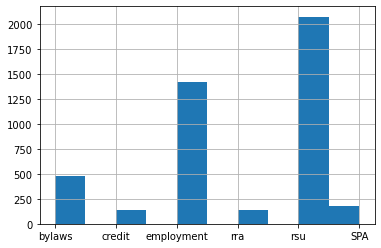

In [6]:
df_train["label"].hist()

In [7]:
# Lables list
the_lables = df_train['label'].unique()
the_lables

array(['bylaws', 'credit', 'employment', 'rra', 'rsu', 'SPA'],
      dtype=object)

In [8]:
#Get sample of bylaws common words
print(df_train.at[1,'label'], df_train.at[1,'common'])


bylaws ['shall', 'board', 'meeting', 'director', 'company', 'may', 'shareholder', 'section', 'president', 'officer', 'chairman', 'time', 'duty', 'certificate', 'notice', 'committee', 'assistant', 'person', 'secretary', 'executive']


In [9]:
#See SPA unique words
df_train[df_train["label"] == 'SPA']['unique']

4244    [this, share, purchase, hereinafter, referred,...
4245    [dated, january, by, and, among, teg, oil, gas...
4246    [this, stock, purchase, is, entered, into, on,...
4247    [stock, purchase, dated, a, of, july, by, and,...
4248    [execution, version, this, stock, purchase, is...
                              ...                        
4422    [this, stock, purchase, the, is, made, and, en...
4423    [this, stock, purchase, is, made, and, entered...
4424    [this, stock, purchase, is, made, a, of, janua...
4425    [the, security, to, which, this, relates, have...
4426    [this, is, made, and, entered, into, a, of, th...
Name: unique, Length: 183, dtype: object

In [67]:
# From the unique words of each document build a list of most common for each label

labels = np.array([])
commonwords = np.array([])
df_new = pd.DataFrame(columns=('labels', 'commons', "dist"))
for idx, label in enumerate(df_train['label'].unique()):
    words = (df_train[df_train["label"] == label]['unique']).to_numpy()
    words_list = np.concatenate((words), axis=None)
    common, dist = find_common_words(" ".join(words_list))
    df_new.loc[idx] = [label, common, dist]
df_new

,labels,commons,dist
0,bylaws,"[corporation, director, article, share, shall,...","[(corporation, 469), (director, 462), (article..."
1,credit,"[loan, term, party, interest, shall, date, amo...","[(loan, 131), (term, 125), (party, 124), (inte..."
2,employment,"[employment, shall, date, party, term, time, m...","[(employment, 1415), (shall, 1408), (date, 140..."
3,rra,"[right, party, may, date, term, section, compa...","[(right, 139), (party, 139), (may, 139), (date..."
4,rsu,"[date, term, may, shall, share, subject, stock...","[(date, 2069), (term, 2068), (may, 2061), (sha..."
5,SPA,"[purchase, shall, ha, share, party, term, may,...","[(purchase, 183), (shall, 182), (ha, 182), (sh..."


In [11]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')

        content = clean_content(content)
        uniques = find_uinque_words(content)
        common, dist = find_common_words(content)

        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,uniques,common))
df_test = pd.DataFrame(data, columns=("id", "content", "unique","common"))


df_test.head(10)

,id,content,unique,common
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec..."
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee..."
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ..."
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p..."
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen..."
5,ajqbd,lender party shandong longkong travel devel...,"[lender, party, shandong, longkong, travel, de...","[party, loan, shall, contract, article, right,..."
6,akjmp,pepco holding inc performance based this r...,"[pepco, holding, inc, performance, based, this...","[stock, participant, shall, award, section, un..."
7,akpvz,this employment effective a of this st da...,"[this, employment, effective, a, of, st, day, ...","[employee, company, shall, employment, termina..."
8,aktjz,the security offered hereby have not been regi...,"[the, security, offered, hereby, have, not, be...","[security, company, option, optionee, act, sha..."
9,alcuh,hei hawaiian electric industry inc with div...,"[hei, hawaiian, electric, industry, inc, with,...","[company, shall, option, section, share, emplo..."


# Submit


In [68]:
df_test_c = df_test.copy()
df_orig_c = df_new.copy()

df_test_c['bylaws'] = '0'
df_test_c['credit'] = '0'
df_test_c['employment'] = '0'
df_test_c['rra'] = '0'
df_test_c['rsu'] = '0'
df_test_c['SPA'] = '0'

df_test_c


,id,content,unique,common,bylaws,credit,employment,rra,rsu,SPA
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec...",0,0,0,0,0,0
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee...",0,0,0,0,0,0
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ...",0,0,0,0,0,0
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p...",0,0,0,0,0,0
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
817,zvwqm,amp holding inc this nonstatutory stock opt...,"[amp, holding, inc, this, nonstatutory, stock,...","[option, share, optionee, shall, company, exer...",0,0,0,0,0,0
818,zwnhd,amended and restated this amended and restated...,"[amended, and, restated, this, employment, the...","[company, officer, shall, may, party, informat...",0,0,0,0,0,0
819,zwvfk,this made and entered into a of august b...,"[this, made, and, entered, into, a, of, august...","[executive, company, shall, employment, affili...",0,0,0,0,0,0
820,zxmpl,of mccormick company incorporated amended an...,"[of, mccormick, company, incorporated, amended...","[director, shall, board, meeting, may, stockho...",0,0,0,0,0,0


In [69]:
#Rank each file content with intersection words of uniques and commons

for index, row in df_test_c.iterrows():
    for idx, l in enumerate(the_lables):
        A1 = row['common']
        A2 = row['unique']
        B = df_orig_c['commons'].iloc[idx]
        row[l] = len(np.intersect1d(A1, B))
        
df_test_c



,id,content,unique,common,bylaws,credit,employment,rra,rsu,SPA
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, share, company, plan, term, shall, sec...",3,4,4,6,8,5
1,acxlg,of trustmark corporation a amended and restate...,"[of, trustmark, corporation, a, amended, and, ...","[shall, director, board, may, corporation, mee...",9,3,3,5,5,3
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, may, share, ...",4,5,6,5,10,7
3,aerlh,this stock option the is made effective a...,"[this, stock, option, the, is, made, effective...","[option, company, share, participant, shall, p...",6,7,6,6,10,8
4,aisgb,employment effective a of the date on whic...,"[employment, effective, a, of, the, date, on, ...","[executive, company, shall, section, employmen...",5,6,9,8,6,5
...,...,...,...,...,...,...,...,...,...,...
817,zvwqm,amp holding inc this nonstatutory stock opt...,"[amp, holding, inc, this, nonstatutory, stock,...","[option, share, optionee, shall, company, exer...",7,3,4,7,10,6
818,zwnhd,amended and restated this amended and restated...,"[amended, and, restated, this, employment, the...","[company, officer, shall, may, party, informat...",6,7,11,9,8,7
819,zwvfk,this made and entered into a of august b...,"[this, made, and, entered, into, a, of, august...","[executive, company, shall, employment, affili...",6,8,11,9,7,6
820,zxmpl,of mccormick company incorporated amended an...,"[of, mccormick, company, incorporated, amended...","[director, shall, board, meeting, may, stockho...",10,5,4,5,6,5


In [70]:
df_test_cs = df_test_c[['id', 'bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']]
df_test_cs

,id,bylaws,credit,employment,rra,rsu,SPA
0,acldm,3,4,4,6,8,5
1,acxlg,9,3,3,5,5,3
2,aehlr,4,5,6,5,10,7
3,aerlh,6,7,6,6,10,8
4,aisgb,5,6,9,8,6,5
...,...,...,...,...,...,...,...
817,zvwqm,7,3,4,7,10,6
818,zwnhd,6,7,11,9,8,7
819,zwvfk,6,8,11,9,7,6
820,zxmpl,10,5,4,5,6,5


In [71]:
df_test_cs['label'] = df_test_cs[['bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']].astype(float).idxmax(axis=1)
print(df_test_cs)

submission = dict(df_test_cs[["id","label"]].values)
submission_name = "Avi_H"
my_submit(submission_name, submission)


<ipython-input-71-0434d5090d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cs['label'] = df_test_cs[['bylaws', 'credit', 'employment','rra', 'rsu', 'SPA']].astype(float).idxmax(axis=1)


        id bylaws credit employment rra rsu SPA       label
0    acldm      3      4          4   6   8   5         rsu
1    acxlg      9      3          3   5   5   3      bylaws
2    aehlr      4      5          6   5  10   7         rsu
3    aerlh      6      7          6   6  10   8         rsu
4    aisgb      5      6          9   8   6   5  employment
..     ...    ...    ...        ...  ..  ..  ..         ...
817  zvwqm      7      3          4   7  10   6         rsu
818  zwnhd      6      7         11   9   8   7  employment
819  zwvfk      6      8         11   9   7   6  employment
820  zxmpl     10      5          4   5   6   5      bylaws
821  zyfno      4      6         12   7   9   4  employment

[822 rows x 8 columns]


0.87834549878346

## Sample submission 2: Submission by string search


# See how you rank
Leaderboard is available at:
https://goren.ml/uattcontract

Accuracy of **90%** and above is required to pass the test

## Leaderboard not refreshing ?
try adding a random suffix to it, like this one:

In [49]:
import random, string
from IPython.display import HTML
rand_str = lambda: "".join(random.sample(string.ascii_letters,7))
HTML('<a href="https://goren.ml/uattcontract/?{k}={v}" target="_blank">Go to Leaderboard</a>'.format(k=rand_str(),v=rand_str()))